<h1><b>Ο Αλγόριθμος <i>Metropolis-Hastings</i></b></h1>

<b>Σημείωση</b>: Η άσκηση αυτή έχει βασιστεί στο άρθρο που μπορεί να βρεθεί <a href="https://www.tweag.io/blog/2019-10-25-mcmc-intro1/">εδώ</a>. Στο συγκεκριμένο άρθρο μπορεί να βρεθεί μια πιο αναλυτική εισαγωγή στις μεθόδους <b><i>Monte Carlo Markov Chain</i> (<i>MCMC</i>)</b> και στον αλγόριθμο <b><i>Metropolis-Hastings</i></b>, καθώς και συνοδευτικά άρθρα για πιο προχωρημένα ζητήματα.

Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <b><i>Metropolis-Hastings</i></b>. Συγκεκριμένα, θα χρησιμοποιήσετε τον αλγόριθμο για να λάβετε δειγματικά στοιχεία (sampling points) από μία <b><i>τυπική κανονική κατανομή</i> (<i>standard normal distribution</i>)</b>, δηλαδή μία κανονική κατανομή συνεχούς τυχαίας μεταβλητής με μέση τιμή $μ=0$ και τυπική απόκλιση $σ=1$. 

Ως <b><i>proposal conditional density</i></b> θα λάβετε μία ομοιόμορφη κατανομή στο διάστημα $(-\frac{Δ}{2}, \frac{Δ}{2})$. Αφού η <b><i>proposal conditional density</i></b> που θα χρησιμοποιήσετε είναι μία συμμετρική κατανομή, ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> θα λάβει την απλοποιημένη μορφή του, δηλαδή η πιθανότητα να πραγματοποιήσετε μία μετάβαση από την κατάσταση $x_{old}$ στην κατάσταση $x_{new}$ για μια κατανομή $π$ θα δίνεται από τον παρακάτω τύπο:

$$
p_{accept}(x_{new} | x_{old}) = min\left[1, \frac{π(x_{new})}{π(x_{old})}\right]
$$

Αναλυτικές οδηγίες σχετικά με το πώς προκύπτει ο παραπάνω τύπος περιλαμβάνονται στις διαφάνειες του μαθήματος, αλλά και στο άρθρο πάνω στο οποίο βασίστηκε η συγκεκριμένη άσκηση.

<h3><b>Υλοποίηση του Αλγορίθμου <i>Metropolis-Hastings</i> σε Python</b></h3>

Αρχικά, θα ορίσουμε τη μέθοδο <b><i>log_prob</i></b>, η οποία θα χρησιμοποιηθεί για τον υπολογισμό τιμών από την <b><i>τυπική κανονική κατανομή</i></b>. Να σημειωθεί ότι λαμβάνεται ο λογάριθμος της κατανομής αυτής. Ο λογάριθμος αυτός μπορεί να υπολογιστεί εύκολα από τον τύπο της <b><i>τυπικής κανονικής κατανομής</i></b>, που είναι διαθέσιμος από <a href="https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution">εδώ</a>. Λόγοι για τους οποίους προτιμάται αυτή η μορφή μπορούν να αναζητηθούν <a href="https://stats.stackexchange.com/questions/137710/metropolis-hastings-using-log-of-the-density">εδώ</a>. Τέλος, οι σταθερές μπορούν να αγνοηθούν από τον τύπο με ασφάλεια λόγω της μορφή του αλγορίθμου <b><i>Metropolis-Hastings</i></b>.

In [1]:
def log_prob(x):
     return -0.5 * np.float64(x ** 2)

Στη συνέχεια, ορίζουμε τη μέθοδο <b><i>proposal</i></b>, η οποία θα χρησιμοποιηθεί για τον υπολογισμό τιμών από την ομοιόμορφη κατανομή, η οποία αποτελεί την <b><i>proposal conditional density</i></b>.

In [2]:
def proposal(x, stepsize):
    return np.random.uniform(low=x - 0.5 * stepsize, 
                             high=x + 0.5 * stepsize, 
                             size=x.shape)

Η πιθανότητα αποδοχής μιας νέας κατάστασης $x_{new}$ δεδομένης της τρέχουσας κατάστασης $x_{old}$ υπολογίζεται από τη παρακάτω μέθοδο. Να σημειωθεί πως στη συγκεκριμένη μέθοδο, ο τύπος $p_{accept}$ που δόθηκε παραπάνω έχει τροποποιηθεί κατάλληλα, ώστε να μην εμφανίζονται αρνητικές τιμές. Οι δύο μορφές του τύπου είναι ισοδύναμες, καθώς σημασία έχει η σύγκριση δύο τιμών και όχι οι ακριβείς τιμές, όπως φαίνεται από τον παραπάνω τύπο.

In [3]:
def p_acc_MH(x_new, x_old, log_prob):
    return min(1, np.exp(log_prob(x_new) - log_prob(x_old)))

Στη συνέχεια, υλοποιείται η μέθοδος με την οποία θα αποφασίζει ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> εάν θα γίνει δεκτό ένα προτεινόμενο βήμα.

In [4]:
import numpy as np
def sample_MH(x_old, log_prob, stepsize):
    x_new = proposal(x_old, stepsize)
    accept = np.random.random() < p_acc_MH(x_new, x_old, log_prob)
    if accept:
        return accept, x_new
    else:
        return accept, x_old

Τέλος, ορίζεται μία συνάρτηση που μετράει πόσες φορές έγιναν αποδεκτά τα προτεινόμενα βήματα.

In [5]:
def build_MH_chain(init, stepsize, n_total, log_prob):

    n_accepted = 0
    chain = [init]

    for _ in range(n_total):
        accept, state = sample_MH(chain[-1], log_prob, stepsize)
        chain.append(state)
        n_accepted += accept
    
    acceptance_rate = n_accepted / float(n_total)
    
    return chain, acceptance_rate

<h3><b>Ερωτήματα (Μέρος Α)</b></h3>

<ul>
<li>Με ποιον τρόπο αποφασίζει ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> εάν θα γίνει δεκτό ένα προτεινόμενο βήμα; Να εξηγήσετε συνοπτικά βάσει των παραπάνω μεθόδων.</li>
<li>Με ποιον τρόπο αξιοποιούνται οι <b><i>αλυσίδες Markov</i> (<i>Markov Chains</i>)</b> από τον αλγόριθμο <b><i>Metropolis-Hastings</i></b> για τη λήψη τυχαίων δειγματικών σημείων από μία κατανομή πιθανοτήτων;</li>
<li>Ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> χρησιμοποιείται για τη λήψη τυχαίου δείγματος από μία κατανομή πιθανοτήτων για την οποία είναι αδύνατο να λάβουμε τέτοια δειγματικά στοιχεία λόγω αδυναμίας πλήρους καταγραφής του δειγματικού χώρου ή/και υπολογισμού κάποιας <b><i>σταθεράς κανονικοποίησης</i></b> που εμφανίζεται στην κατανομή. Έτσι, λαμβάνεται ως <b><i>κατανομή στόχος</i></b> μία κατανομή που έχει γνωστή μορφή, ανάλογη με την κατανομή από την οποία θέλουμε να λάβουμε τα δειγματικά στοιχεία. Με ποιον τρόπο καταφέρνει ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> να δώσει αποτελέσματα παρά το γεγονός ότι αγνοεί τη <b><i>σταθερά κανονικοποίησης</i></b>;
</ul>

### Απαντήσεις (Μέρος Α)

- <font color='#486393'>Δεδομένου πως μετά από $t$ βήματα του αλγορίθμου βρισκόμαστε στην κατάσταση $x_t$, ο αλγόριθμος επιλέγει ένα τυχαίο δείγμα $x_\text{new}$ από την «προτεινόμενη κατανομή». Στην προκείμενη υλοποίηση η προτεινόμενη κατανομή είναι μια ομοιόμορφη κατανομή εύρους $\Delta$ γύρω από την τιμή $x_t$, δηλαδή</font>
    
<font color='#486393'>$$x_\text{new} \sim \mathcal{U}\left(x_t-\frac{\Delta}{2},x_t+\frac{\Delta}{2}\right).$$</font>

<font color='#486393'>Κατόπιν, υπολογίζεται η ποσότητα $p = \frac{\tilde{\pi}\left(x_\text{new}\right)}{\tilde{\pi}\left(x_t\right)}$, όπου $\tilde{\pi}\left(x\right) \propto \pi\left(x\right)$, με $\pi\left(x\right)$ να είναι η κατανομή-στόχος, της οποίας δε γνωρίζουμε τη σταθερά κανονικοποίησης (δηλαδή τη συνάρτηση επιμερισμού της). Στην προκείμενη περίπτωση χρησιμοποιείται η</font>

<font color='#486393'>$$\tilde{\pi}\left(x\right) = \exp\left(-\frac{1}{2}x^2\right),$$</font>

<font color='#486393'>οπότε η υπολογισμένη ποσότητα είναι η</font>

<font color='#486393'>$$p = \frac{\tilde{\pi}\left(x_\text{new}\right)}{\tilde{\pi}\left(x_t\right)} = \exp\left[-\frac{1}{2}\left(x_\text{new}-x_t\right)^2\right].$$</font>

<font color='#486393'>Η ποσότητα $p$ είναι η ποσότητα ελέγχου, η οποία καθορίζει το κατά πόσο η $x_\text{new}$ θα γίνει αποδεκτή ή όχι ως η κατάσταση $x_{t+1}$. Συγκεκριμένα, μια ψευδοτυχαία μεταβλητή $\chi$ γεννάται στο διάστημα $\left[0,1\right]$ και εάν $p < \chi$, τότε η τιμή $x_\text{new}$ απορρίπτεται και το βήμα $x_{t+1}$ ταυτίζεται με το $x_t$. Από την άλλη, εάν $p \geq \chi$, τότε η τιμή $x_\text{new}$ γίνεται δεκτή και το βήμα $x_{t+1}$ ταυτίζεται με αυτήν. Σημειώνεται εδώ πως στον παραπάνω κώδικα δε γίνεται απευθείας η συγκεκριμένη σύγκριση. Αντίθετα, αφότου προσδιοριστεί η ποσότητα $p$, πραγματοποιείται ένας έλεγχος σχετικά με το αν $p > 1$ και στην περίπτωση που ισχύει, η ποσότητα $p$ τίθεται ίση με τη μονάδα. Φυσικά, κάτι τέτοιο δεν είναι απαραίτητο για τη λειτουργικότητα του αλγορίθμου, αφού τόσο η μονάδα, όσο και οποιοσδήποτε αριθμός $p > 1$ θα είναι υψηλότερος από τον $\chi$.</font>

<font color='#486393'>Κλείνοντας τη σύντομη αυτή παρουσίαση του αλγορίθμου, αξίζει να αναφερθούν δύο σημαντικά σημεία. Καταρχάς, ο αλγόριθμος που περιγράφεται στα παραπάνω είναι στην πραγματικότητα ο αλγόριθμος Metropolis, ο οποίος είναι μια ειδική περίπτωση του Metropolis-Hastings. Επειδή, όμως, η προτεινόμενη κατανομή είναι συμμετρική, ο Metropolis-Hastings γίνεται εντελώς ισοδύναμος με τον Metropolis. Το δεύτερο σχόλιο έχει να κάνει με την επιλογή της $\tilde{\pi}\left(x\right)$. Οποιαδήποτε κατανομή της μορφής $\alpha \tilde{\pi}\left(x\right)$, με $\alpha 
\in \mathbb{R}$ θα ήταν αποδεκτή, καθώς η ποσότητα που υπεισέρχεται στον αλγόριθμο είναι το κλάσμα $\frac{\tilde{\pi}\left(x_\text{new}\right)}{\tilde{\pi}\left(x_t\right)}$, με αποτέλεσμα οι σταθεροί συντελεστές να απλοποιούνται. Αυτός εξάλλου είναι και ο λόγος της επιτυχίας του αλγορίθμου Metropolis-Hastings, ο οποίος κατασκευάστηκε για να αξιοποιείται σε περιπτώσεις όπου η ακριβής μορφή της $\pi\left(x\right)$ δεν είναι γνωστή.</font>

- <font color='#486393'>Όπως γίνεται εμφανές από την προηγούμενη ανάλυση, κάθε κατάσταση εξαρτάται αποκλειστικά από την αμέσως προηγούμενή της (και, αντίστοιχα, καθορίζει αποκλειστικά την αμέσως επόμενη), αφού το κατά πόσο το δείγμα κάθε βήματος γίνεται αποδεκτό ή όχι εξαρτάται από το λόγο $p$. Έτσι, η αλληλουχία των δειγμάτων αντιστοιχεί σε μια αλυσίδα Markov τάξης 1. Αυτός ακριβώς είναι και ο λόγος για τον οποίο τα δείγματα που προκύπτουν μέσω αυτής της μεθόδου παύουν να θεωρούνται i.i.d. (independent and identically distributed), αν και υπάρχουν τρόποι η μεταξύ τους εξάρτηση να ελαχιστοποιηθεί.</font>

- <font color='#486393'>Όπως αναλύθηκε και στο πρώτο ερώτημα, η κατανομή $\tilde{\pi}\left(x\right)$ συνδέεται με την κατανομή-στόχο, $\pi\left(x\right)$, μέσω μιας σχέσης της μορφής</font>

<font color='#486393'>$$ \tilde{\pi}\left(x\right) = \mathcal{Z}\pi\left(x\right),$$</font>

<font color='#486393'>με $\mathcal{Z} \in \mathbb{R}$. Εφόσον οι κατανομές διαφέρουν μόνο κατά ένα συντελεστή, η ποσότητα $p$ μπορεί ισοδύναμα να γραφεί ως</font>

<font color='#486393'>$$p = \frac{\tilde{\pi}\left(x_\text{new}\right)}{\tilde{\pi}\left(x_t\right)} = \frac{\mathcal{Z}\tilde{\pi}\left(x_\text{new}\right)}{\mathcal{Z}\tilde{\pi}\left(x_t\right)} = \frac{\pi\left(x_\text{new}\right)}{\pi\left(x_t\right)}.$$</font>

<font color='#486393'>Έτσι, αφού μόνο η ποσότητα $p$ υπεισέρχεται στη διαδικασία απόφασης για την αποδοχή ή απόρριψη ενός νέου δείγματος, επιτυγχάνεται στην ουσία η αξιολόγηση της δειγματοληψίας από την ίδια την κατανομή-στόχο.</font>

<h3><b>Δοκιμές του Αλγορίθμου <i>Metropolis-Hastings</i></b></h3>

Το παρακάτω τμήμα κώδικα ασχολείται με την κλήση των παραπάνω μεθόδων και την οπτικοποίηση των αποτελεσμάτων.

In [6]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

mycol = (72/255, 99/255, 147/255)
mycomplcol = (129/255, 143/255, 163/255)

import seaborn as sns
sns.set(style = "darkgrid") # καθαρά αισθητικοί λόγοι

def plot_samples(chain, log_prob, ax, orientation='vertical', normalize=True,
                 xlims=(-5, 5), legend=True):
    from scipy.integrate import quad
    
    ax.hist(chain, bins=50, density=True, color=mycol, label="MCMC samples",
           orientation=orientation, edgecolor='none')
    # we numerically calculate the normalization constant of our PDF
    if normalize:
        Z, _ = quad(lambda x: np.exp(log_prob(x)), -np.inf, np.inf)
    else:
        Z = 1.0
    xses = np.linspace(xlims[0], xlims[1], 1000)
    yses = [np.exp(log_prob(x)) / Z for x in xses]
    if orientation == 'horizontal':
        (yses, xses) = (xses, yses)
    ax.plot(xses, yses, color=mycomplcol, label="true distribution")
    if legend:
        ax.legend(frameon=False)

def sample_and_display(init_state, stepsize, n_total, n_burnin, log_prob):
    chain, acceptance_rate = build_MH_chain(init_state, stepsize, n_total, log_prob)
    print("Acceptance rate: {:.3f}".format(acceptance_rate))
    fig, ax = plt.subplots()
    plot_samples([state for state, in chain[n_burnin:]], log_prob, ax)
    ax.set_yticks(())
    plt.show()

Το αποτέλεσμα που περιμένετε να δείτε από τη συγκεκριμένη άσκηση είναι ότι ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> θα σας επιστρέψει δειγματικά στοιχεία τα οποία θα ακολουθούν <b><i>τυπική κανονική κατανομή</i></b>.

Εκτελέστε την παρακάτω μέθοδο για μέγεθος βήματος $Δ = 3.0$ και συνολικό αριθμό βημάτων $10000$. Παρατηρήστε ότι η κατανομή που προκύπτει είναι πολύ κοντά σε μία <b><i>τυπική κανονική</i></b>, ενώ το ποσοστό των βημάτων που έγιναν δεκτά από τον αλγόριθμο <b><i>Metropolis-Hastings</i></b> είναι περίπου $70$%.

Acceptance rate: 0.718


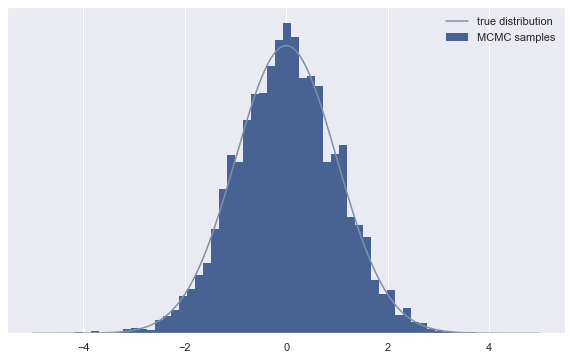

In [7]:
sample_and_display(np.array([2.0]), 3.0, 10000, 500, log_prob)

<h3><b>Ερωτήματα (Μέρος Β)</b></h3>

Να επαναλάβετε για $Δ=30$ και συνολικό αριθμό βημάτων $10000$. Τι παρατηρείτε ότι συμβαίνει στην περίπτωση που χρησιμοποιείτε ένα πολύ μεγάλο βήμα, δηλαδή πολύ μεγάλη τιμή για την παράμετρο $Δ$; Να επαναλάβετε για $Δ=300$, $Δ=3000$ και $Δ=30000$, ώστε να επιβεβαιώσετε το συμπέρασμά σας. Σχολιάστε και το ποσοστό των αποδεκτών βημάτων.

Acceptance rate: 0.111


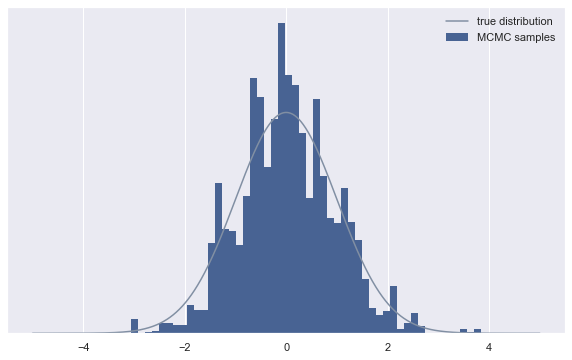

In [8]:
sample_and_display(np.array([2.0]), 30, 10000, 500, log_prob)

<font color='#486393'>Γίνεται εμφανές πως η αύξηση του βήματος $\Delta$, κρατώντας όλες τις υπόλοιπες παραμέτρους σταθερές, οδηγεί σε μια λιγότερο ικανοποιητική προσέγγιση της κατανομής. Πέραν αυτού, το ποσοστό των αποδεκτών βημάτων μειώνεται σημαντικά, από περίπου 70% που ήταν στην περίπτωση $\Delta = 3.0$, σε περίπου 10%. Προκειμένου να επαληθεύσουμε πως τα συμπεράσματα αυτά ισχύουν, θα ελέγξουμε κατά πόσο γενικεύονται για υψηλότερες τιμές του $\Delta$, κρατώντας όλες τις υπόλοιπες παραμέτρους σταθερές.</font>

Acceptance rate: 0.011


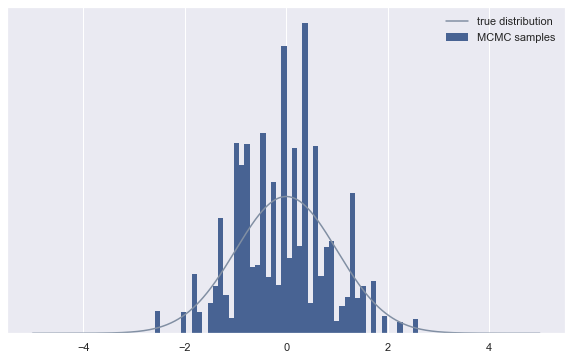

In [9]:
sample_and_display(np.array([2.0]), 300, 10000, 500, log_prob)

Acceptance rate: 0.001


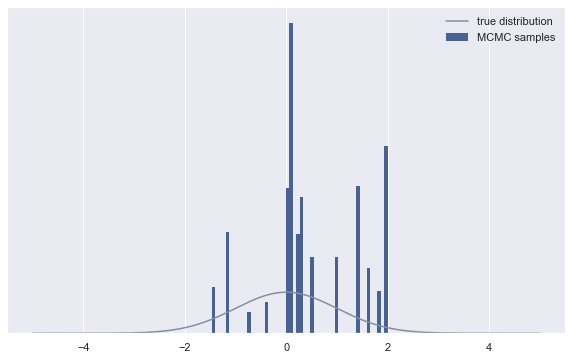

In [10]:
sample_and_display(np.array([2.0]), 3000, 10000, 500, log_prob)

Acceptance rate: 0.000


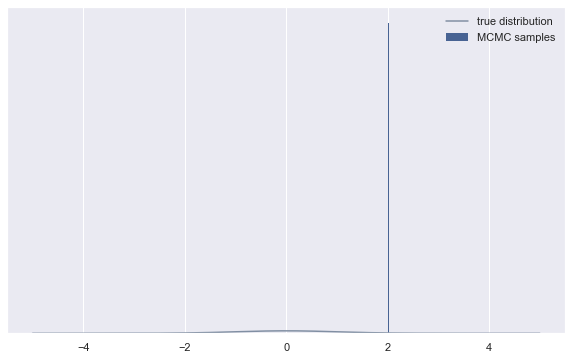

In [11]:
sample_and_display(np.array([2.0]), 30000, 10000, 500, log_prob)

<font color='#486393'>Πράγματι, καθώς το $\Delta$ αυξάνεται περαιτέρω, η προσέγγιση της κατανομής-στόχου γίνεται ολοένα χειρότερη, ενώ το ποσοστό αποδοχής μειώνεται σημαντικά. Τα αποτελέσματα των προσομοιώσεων για 10000 βήματα και διαφορετικές τιμές του $\Delta$ παρατίθενται στον ακόλουθο πίνακα.</font>

| $\Delta$ | Ποσοστό Αποδοχής |
| :---: | :---: |
| 3 | 71.8% |
| 30 | 11.1% |
| 300 | 1.1% |
| 3000 | 0.1% |
| 3000 | $\sim$0.0% |

<font color='#486393'>Στο σημείο αυτό πρέπει να τονιστεί πως το σφάλμα αποδοχής δεν αποτελεί από μόνο του κατάλληλο δείκτη του κατά πόσο η προσαρμογή είναι καλή ή όχι. Για παράδειγμα, αυξάνοντας το πλήθος των βημάτων από 10000 σε 100000 στην περίπτωση όπου $\Delta = 300$, αναμένει κανείς να λάβει παρόμοιο σφάλμα αποδοχής, όμως τα τελικά αποδεκτά δείγματα θα προσεγγίζουν αισθητά πιο ικανοποιητικά την κατανομή-στόχο. Για του λόγου το αληθές:</font>

Acceptance rate: 0.010


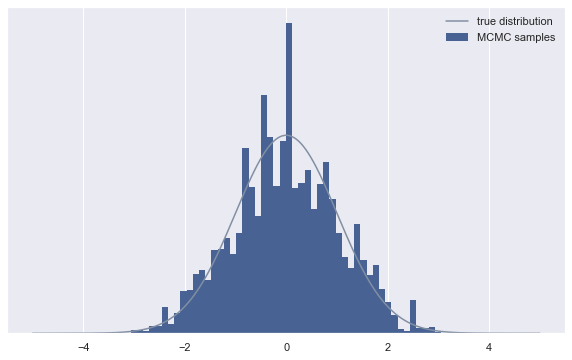

In [12]:
sample_and_display(np.array([2.0]), 300, 100000, 500, log_prob)

<font color='#486393'>Ο λόγος για τον οποίο η αύξηση της τιμής του $\Delta$ οδηγεί σε σημαντικές αποκλίσεις από την κατανομή-στόχο είναι πως η αύξηση του $\Delta$ ταυτίζεται με τη διεύρυνση του διαστήματος από το οποίο πραγματοποιείται η δειγματοληψία σε κάθε βήμα. Έτσι, η πιθανότητα ένα δείγμα να λαμβάνεται σε περιοχή όπου η πυκνότητα της κατανομής-στόχου είναι πρακτικά μηδενική αυξάνεται επίσης σημαντικά. Αντίστοιχο είναι το επιχείρημα και για το χαμηλό ποσοστό αποδοχής, αφού η πιθανότητα ένα νέο δείγμα να λαμβάνεται σε περιοχή πολύ απομακρυσμένη από αυτήν στην οποία γεννήθηκε το δείγμα του προηγούμενου βήματος αυξάνεται σημαντικά, με αποτέλεσμα η τιμή του $p$ να είναι πάντοτε υψηλή και άρα η πλειοψηφία των δειγμάτων να απορρίπτεται.</font>

Να επαναλάβετε για $Δ=0.1$, δηλαδή μία πολύ μικρή τιμή για το βήμα. Τι παρατηρείτε; Είναι ικανοποιητικά τα αποτελέσματά σας; Σχολιάστε και το ποσοστό των αποδεκτών βημάτων. Να επαναλάβετε για $Δ=0.01$.

Acceptance rate: 0.989


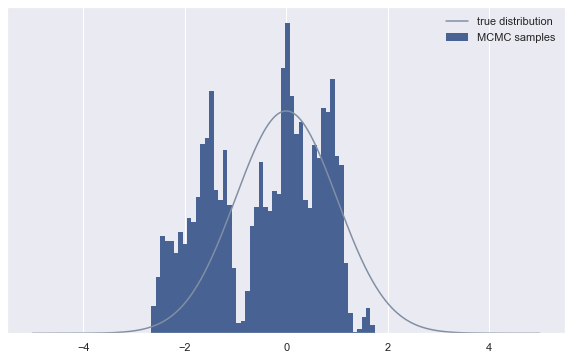

Wall time: 356 ms


In [13]:
%%time
sample_and_display(np.array([2.0]), 0.1, 10000, 500, log_prob)

Acceptance rate: 0.998


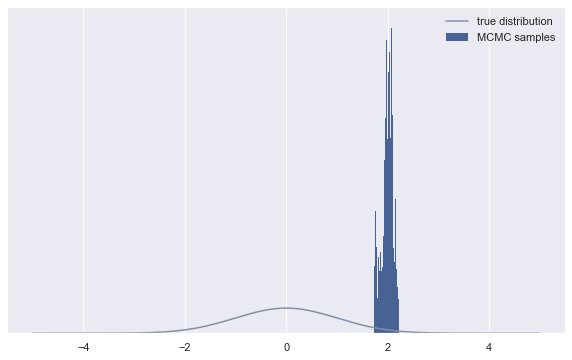

Wall time: 361 ms


In [14]:
%%time
sample_and_display(np.array([2.0]), 0.01, 10000, 500, log_prob)

<font color='#486393'>Κινούμενοι τώρα στην αντίθετη κατεύθυνση, δηλαδή τη μείωση της τιμής του $\Delta$, είναι αναμενόμενο το ποσοστό αποδοχής να αυξάνεται σημαντικά, αφού οι συνθήκες είναι τώρα αντίστροφες: το δείγμα κάθε βήματος αναμένεται να λαμβάνεται σχετικά κοντά στο δείγμα του προηγούμενου βήματος, με αποτέλεσμα η τιμή του $p$ να είναι συνεχώς αρκετά κοντά στη μονάδα. Έτσι, όμως, η προσέγγιση της κατανομής-στόχου παραμένει μη ικανοποιητική, αφού δεν απορρίπτονται αρκετά δείγματα προκειμένου να είναι σαφές το ποια δείγματα αντιστοιχούν πραγματικά στην κατανομή-στόχο. Όπως φάνηκε παραπάνω, ο μόνος τρόπος να διορθωθεί κάπως το τελικό αποτέλεσμα για «ακατάλληλες» του $\Delta$, θα ήταν η αύξηση του πλήθους των συνολικών βημάτων.</font>

Να επαναλάβετε αυξάνοντας το συνολικό αριθμό βημάτων που θα πραγματοποιηθούν σε $500000$. Τι παρατηρείτε σχετικά με την ακρίβεια των αποτελεσμάτων σας, αλλά και το χρόνο εκτέλεσης του αλγορίθμου <b><i>Metropolis-Hastings</i></b>;

Acceptance rate: 0.990


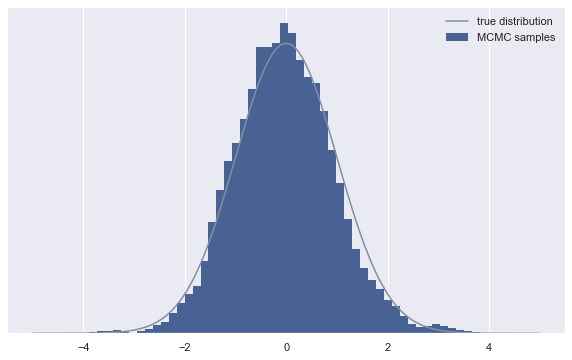

Wall time: 10.4 s


In [15]:
%%time
sample_and_display(np.array([2.0]), 0.1, 500000, 500, log_prob)

Acceptance rate: 0.999


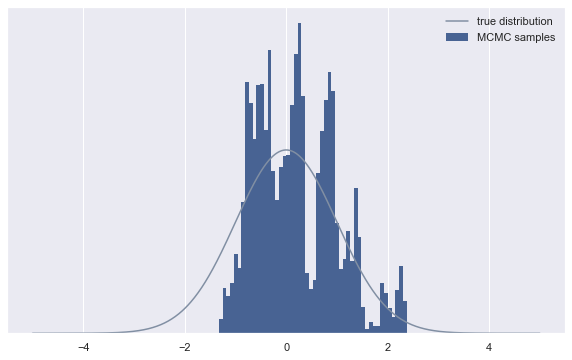

Wall time: 10.2 s


In [16]:
%%time
sample_and_display(np.array([2.0]), 0.01, 500000, 500, log_prob)

<font color='#486393'>Πράγματι, η αύξηση του συνολικού πλήθους βημάτων βελτιώνει αρκετά την προσέγγιση στην κατανομή-στόχο, ενώ διατηρεί το ποσοστό αποδοχής σε πρακτικά ίδιες τιμές, όπως παρατηρήθηκε και στην περίπτωση των $\Delta > 3$. Το κόστος που έχει η βελτίωση της προσέγγισης της κατανομής-στόχου είναι χρονικό. Ενώ για 10000 βήματα ο χρόνος εκτέλεσης ήταν $\mathcal{O}\left(0.1\right)$ s, για 500000 βήματα αυξάνεται σε $\mathcal{O}\left(1\right)$ - $\mathcal{O}\left(10\right)$ s, δηλαδή 1 με 2 τάξεις μεγέθους.</font>

Η συνάρτηση <b><i>sample_and_display</i></b> περιλαμβάνει το n_burnin ως τέταρτο όρισμα. Ποια είναι η χρησιμότητα του ορίσματος αυτού; Δοκιμάστε τις παρακάτω τιμές:
<ul>
<li>$Δ=0.1$, αριθμός βημάτων $1000$ και n_burnin=$10$.</li>
<li>$Δ=0.1$, αριθμός βημάτων $500000$ και n_burnin=$490000$.</li>
</ul>
Τι παρατηρείτε;

<font color='#486393'>Παρότι μέχρι αυτό το σημείο δεν είχε σχολιαστεί, όλες οι προηγούμενες εκτελέσεις περιλάμβαναν την παράμετρο `n_burnin`, η οποία είχε τεθεί ίση με 500 σε όλες τις εκτελέσεις. Ο ρόλος της εν λόγω παραμέτρου είναι ο ακόλουθος: όπως έχει ήδη σχολιαστεί αρκετά, η αποδοχή των δειγμάτων καθορίζεται αποκλειστικά από την ποσότητα $p$, η οποία είναι ισοδύναμη για την $\tilde{\pi}\left(x\right)$ και την $\pi\left(x\right)$. Παρ' όλα αυτά, το αρχικό δείγμα λαμβάνεται τυχαία, επομένως στην πράξη απαιτείται ένα πλήθος βημάτων προκειμένου η αρχική αυτή επιλογή να «ξεχαστεί» και τα αποτελέσματα να προσεγγίζουν πραγματικά την κατανομή-στόχο, ανεξαρτήτως αρχικοποίησης. Έτσι, η παράμετρος `n_burnin` αντιστοιχεί στο πλάθος των πρώτων βημάτων που δεν λαμβάνονται υπ' όψιν κατά την προσέγγιση της κατανομής-στόχου. Λαμβάνοντας τα πάντα υπ' όψιν, η βέλτιστη προσέγγιση προκύπτει με μια κατάλληλη επιλογή του $\Delta$, αρκετά υψηλό αριθμό βημάτων (χωρίς όμως να είναι τόσα που να απαιτούν απαγορευτικούς χρόνους εκτέλεσης) και σχετικά μεγάλες τιμές για την παράμετρο `n_burnin`, αρκεί φυσικά να αφήνει περιθώρια για αρκετά βήματα (δηλαδή η διαφορά μεταξύ `n_burnin` και συνολικού πλήθους βημάτων να είναι αρκούντως υψηλή). Παρακάτω φαίνεται η επιρροή της `n_burnin` στην προσέγγιση.</font>

Acceptance rate: 0.984


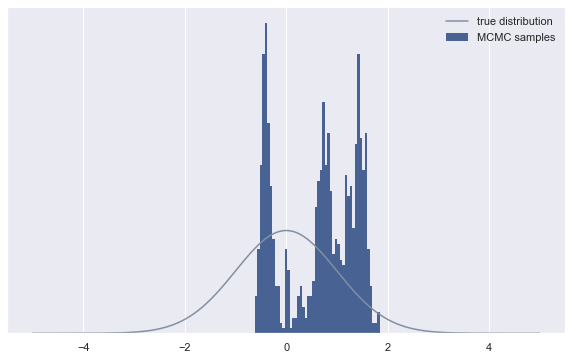

In [17]:
sample_and_display(np.array([2.0]), 0.1, 1000, 10, log_prob)

Acceptance rate: 0.990


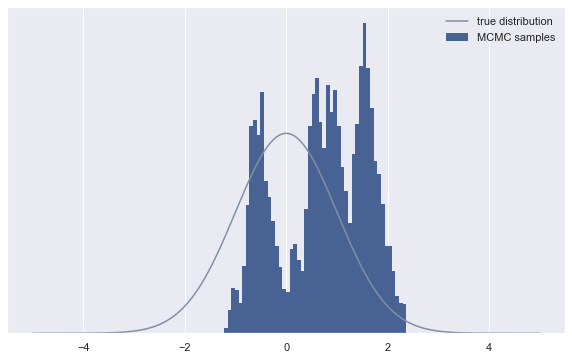

In [18]:
sample_and_display(np.array([2.0]), 0.1, 500000, 490000, log_prob)

<font color='#486393'>Στις περιπτώσεις αυτές βλέπουμε τις δύο ακραίες περιπτώσεις που αφορούν την επιρροή του `n_burnin`. Στην πρώτη περίπτωση, από το τελικό αποτέλεσμα αφαιρούνται μόνο τα πρώτα 10 δείγματα, ένα νούμερο το οποίο δεν μπορεί κανείς να θεωρήσει πως αρκεί προκειμένου η αρχική κατάσταση να ξεχαστεί. Βέβαια, το σύνολο των βημάτων είναι τόσο μικρό, με αποτέλεσμα η προσέγγιση ούτως ή άλλως να μην είναι ικανοποιητική. Στη δεύτερη περίπτωση, από το τελικό αποτέλεσμα αφαιρείται το 98% των δειγμάτων, με αποτέλεσμα η αρχική κατάσταση να έχει όντως ξεχαστεί, όμως το υπόλοιπο των βημάτων μετά την burn-in περίοδο να μην επαρκεί για να αντικατοπτρίσει την κατανομή-στόχο. Όπως φάνηκε στην περίπτωση $\Delta = 0.1$ με σύνολο 500000 βημάτων και `n_burnin` = 500, ένας αρμονικός συνδυασμός μεταξύ των τριών αυτών παραμέτρων μπορεί να δώσει παραπάνω από ικανοποιητικά αποτελέσματα.</font>